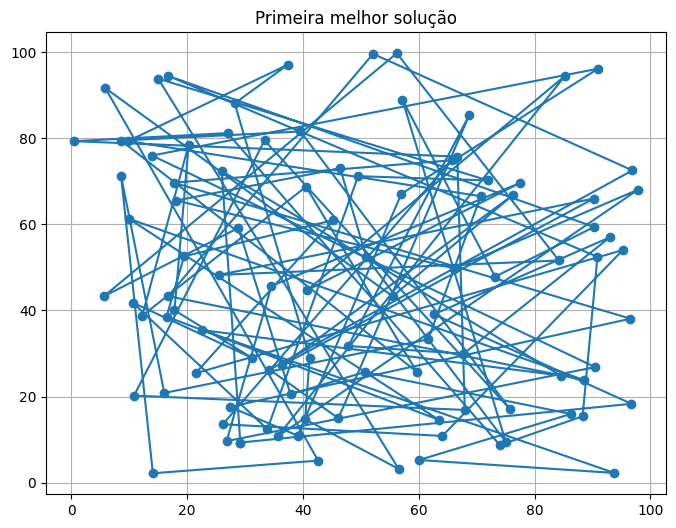

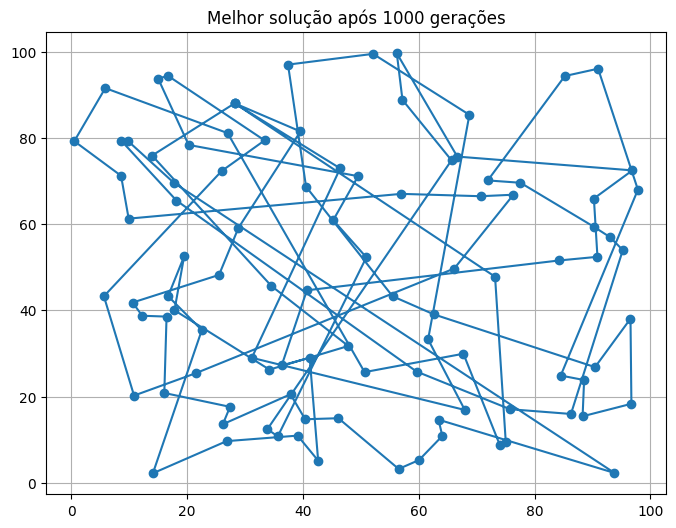

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parâmetros
NUM_CITIES = 100
POP_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.01

# Gerar coordenadas aleatórias para as cidades (espaço 100x100)
cities = np.random.rand(NUM_CITIES, 2) * 100

# Distância total de um percurso (vetorizada)
def total_distance(path, cities):
    coords = cities[path]
    return np.sum(np.linalg.norm(np.diff(coords, axis=0), axis=1))

# Criar um indivíduo (rota aleatória começando e terminando na mesma cidade)
def create_individual(start_city=0):
    individual = list(range(1, NUM_CITIES))
    random.shuffle(individual)
    return [start_city] + individual + [start_city]

# Criar população inicial
def create_population():
    return [create_individual() for _ in range(POP_SIZE)]

# Cruzamento OX (Order Crossover)
def order_crossover(parent1, parent2):
    start, end = sorted(random.sample(range(1, NUM_CITIES), 2))
    child = [-1] * NUM_CITIES
    child[start:end] = parent1[start:end]
    p2_index = 1
    for i in range(1, NUM_CITIES):
        if child[i] == -1:
            while parent2[p2_index] in child:
                p2_index += 1
            child[i] = parent2[p2_index]
    return [child[0]] + child[1:] + [child[0]]

# Mutação: troca duas cidades aleatórias
def mutate(individual):
    if random.random() < MUTATION_RATE:
        idx1, idx2 = random.sample(range(1, NUM_CITIES), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Seleção por torneio
def tournament_selection(population, scores, k=5):
    selected = random.sample(list(zip(population, scores)), k)
    return min(selected, key=lambda x: x[1])[0]

# Evoluir a população
def evolve_population(population, cities):
    new_population = []
    scores = [total_distance(ind, cities) for ind in population]
    best_idx = np.argmin(scores)
    best_individual = population[best_idx]
    new_population.append(best_individual)  # Elitismo

    while len(new_population) < POP_SIZE:
        parent1 = tournament_selection(population, scores)
        parent2 = tournament_selection(population, scores)
        child = order_crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    return new_population, best_individual, scores[best_idx]

# Plotar rota
def plot_path(path, cities, title):
    plt.figure(figsize=(8, 6))
    x = [cities[i][0] for i in path]
    y = [cities[i][1] for i in path]
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Inicializar e executar o algoritmo
population = create_population()
first_best = population[0]
first_best_distance = total_distance(first_best, cities)
best_overall = first_best
best_overall_distance = first_best_distance
history = [first_best_distance]

for generation in range(GENERATIONS):
    population, best, best_distance = evolve_population(population, cities)
    if best_distance < best_overall_distance:
        best_overall = best
        best_overall_distance = best_distance
    history.append(best_overall_distance)

# Plotar soluções
plot_path(first_best, cities, "Primeira melhor solução")
plot_path(best_overall, cities, f"Melhor solução após {GENERATIONS} gerações")